# Introdução a séries temporais

Uma série temporal é um conjunto de observações de uma variável ao longo do tempo.

Alguns exemplos de séries temporais:

- Temperatura registrada ao longo do ano em uma cidade;
- Faturamento das vendas de sorvete ao longo do ano;
- Valores de emissão de CO2 em uma cidade;
- Preço das ações de determinada companhia;
- Número de acidentes ocorridos em uma rodovia durante um mês.

Algumas características:

- Autocorrelação;
- Tendência;
- Sazonalidade.

<img src="https://i1.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/series-temporais-2-1024x644.png?resize=1024%2C644" alt="Número de passageiros x tempo" style="width: 800px;"/>

# Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Importando dados de COVID-19

Dados extraídos do [Our World in Data](https://ourworldindata.org/coronavirus-data). Mais detalhes no repositório: https://github.com/owid/covid-19-data/tree/master/public/data

In [2]:
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72091,ZWE,Africa,Zimbabwe,2021-02-25,35994.0,34.0,64.429,1458.0,2.0,5.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72092,ZWE,Africa,Zimbabwe,2021-02-26,36044.0,50.0,47.714,1463.0,5.0,4.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72093,ZWE,Africa,Zimbabwe,2021-02-27,36058.0,14.0,41.429,1463.0,0.0,4.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72094,ZWE,Africa,Zimbabwe,2021-02-28,36089.0,31.0,41.857,1463.0,0.0,3.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


## Preenchendo valores nulos

In [4]:
df = df.fillna(0)

In [5]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72091,ZWE,Africa,Zimbabwe,2021-02-25,35994.0,34.0,64.429,1458.0,2.0,5.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72092,ZWE,Africa,Zimbabwe,2021-02-26,36044.0,50.0,47.714,1463.0,5.0,4.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72093,ZWE,Africa,Zimbabwe,2021-02-27,36058.0,14.0,41.429,1463.0,0.0,4.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72094,ZWE,Africa,Zimbabwe,2021-02-28,36089.0,31.0,41.857,1463.0,0.0,3.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


## Manipulando tipos das colunas

In [6]:
df = df.astype({'total_cases': int, 'new_cases': int,
                'new_cases_smoothed': int, 'total_deaths': int, 'new_deaths': int, 
                'new_deaths_smoothed': int})

In [7]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1,1,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1,0,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1,0,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1,0,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1,0,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72091,ZWE,Africa,Zimbabwe,2021-02-25,35994,34,64,1458,2,5,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72092,ZWE,Africa,Zimbabwe,2021-02-26,36044,50,47,1463,5,4,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72093,ZWE,Africa,Zimbabwe,2021-02-27,36058,14,41,1463,0,4,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72094,ZWE,Africa,Zimbabwe,2021-02-28,36089,31,41,1463,0,3,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [8]:
df.date = pd.to_datetime(df.date)

In [9]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1,1,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1,0,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1,0,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1,0,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1,0,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72091,ZWE,Africa,Zimbabwe,2021-02-25,35994,34,64,1458,2,5,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72092,ZWE,Africa,Zimbabwe,2021-02-26,36044,50,47,1463,5,4,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72093,ZWE,Africa,Zimbabwe,2021-02-27,36058,14,41,1463,0,4,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72094,ZWE,Africa,Zimbabwe,2021-02-28,36089,31,41,1463,0,3,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


## Filtrando apenas os dados do Brasil

In [10]:
brasil = df[df.location == 'Brazil']

In [11]:
brasil.reset_index(drop=True)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,BRA,South America,Brazil,2020-02-26,1,1,0,0,0,0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
1,BRA,South America,Brazil,2020-02-27,1,0,0,0,0,0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
2,BRA,South America,Brazil,2020-02-28,1,0,0,0,0,0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
3,BRA,South America,Brazil,2020-02-29,2,1,0,0,0,0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
4,BRA,South America,Brazil,2020-03-01,2,0,0,0,0,0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,BRA,South America,Brazil,2021-02-25,10390461,65998,51405,251498,1541,1148,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
366,BRA,South America,Brazil,2021-02-26,10455630,65169,53060,252835,1337,1156,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
367,BRA,South America,Brazil,2021-02-27,10517232,61602,54012,254221,1386,1177,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
368,BRA,South America,Brazil,2021-02-28,10551259,34027,54726,254942,721,1205,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765


## Selecionando colunas

In [12]:
brasil = brasil[['date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths']]

In [13]:
brasil

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths
9261,2020-02-26,1,1,0,0,0
9262,2020-02-27,1,0,0,0,0
9263,2020-02-28,1,0,0,0,0
9264,2020-02-29,2,1,0,0,0
9265,2020-03-01,2,0,0,0,0
...,...,...,...,...,...,...
9626,2021-02-25,10390461,65998,51405,251498,1541
9627,2021-02-26,10455630,65169,53060,252835,1337
9628,2021-02-27,10517232,61602,54012,254221,1386
9629,2021-02-28,10551259,34027,54726,254942,721


## Plotando gráficos das variáveis ao longo do tempo

In [14]:
new_cases = brasil[['date', 'new_cases']]
new_cases.set_index('date', inplace=True)

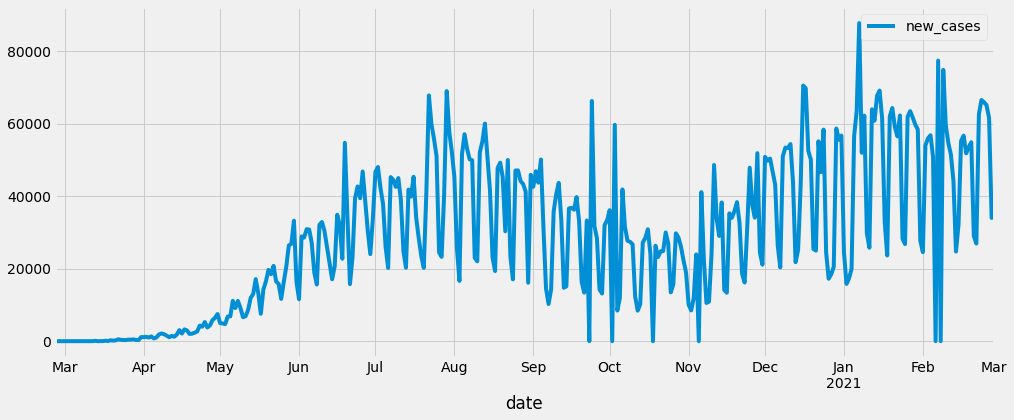

In [15]:
new_cases.plot(figsize=(15, 6))
plt.show()

In [16]:
new_cases_smoothed = brasil[['date', 'new_cases_smoothed']]
new_cases_smoothed.set_index('date', inplace=True)

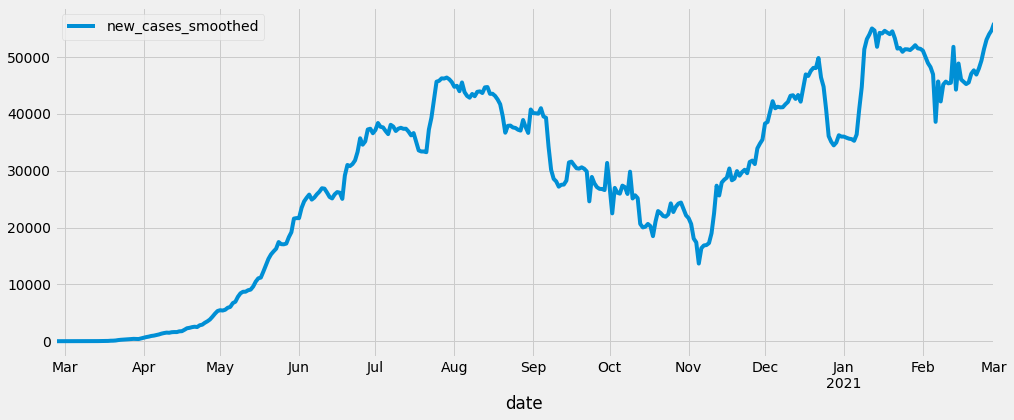

In [17]:
new_cases_smoothed.plot(figsize=(15,6))
plt.show()

In [18]:
total_cases = brasil[['date', 'total_cases']]
total_cases.set_index('date', inplace=True)

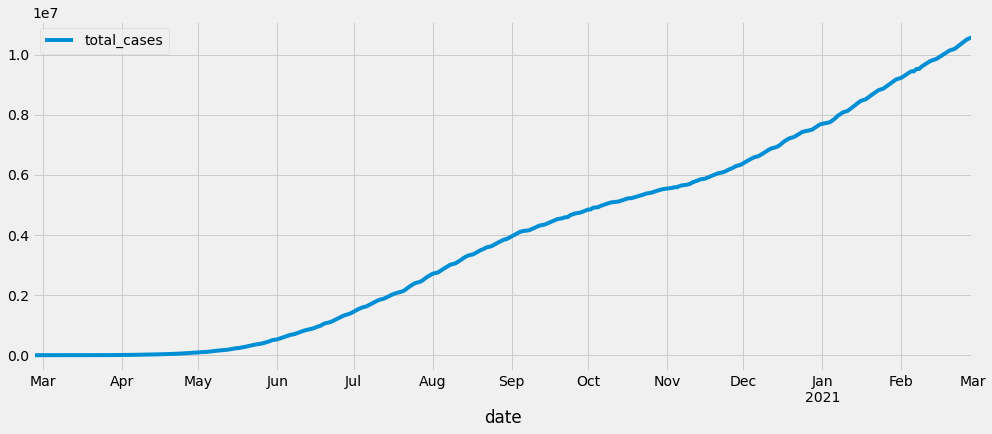

In [19]:
total_cases.plot(figsize=(15,6))
plt.show()

In [20]:
new_deaths = brasil[['date', 'new_deaths']]
new_deaths.set_index('date', inplace=True)

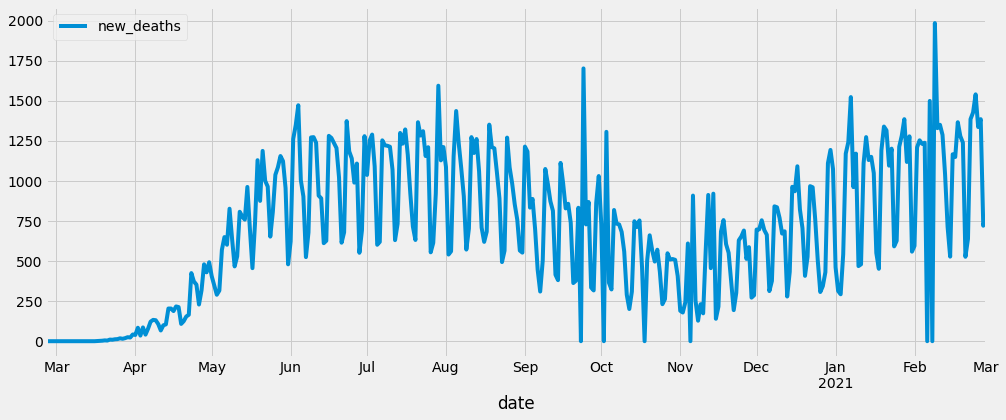

In [21]:
new_deaths.plot(figsize=(15,6))
plt.show()

In [22]:
total_deaths = brasil[['date', 'total_deaths']]
total_deaths.set_index('date', inplace=True)

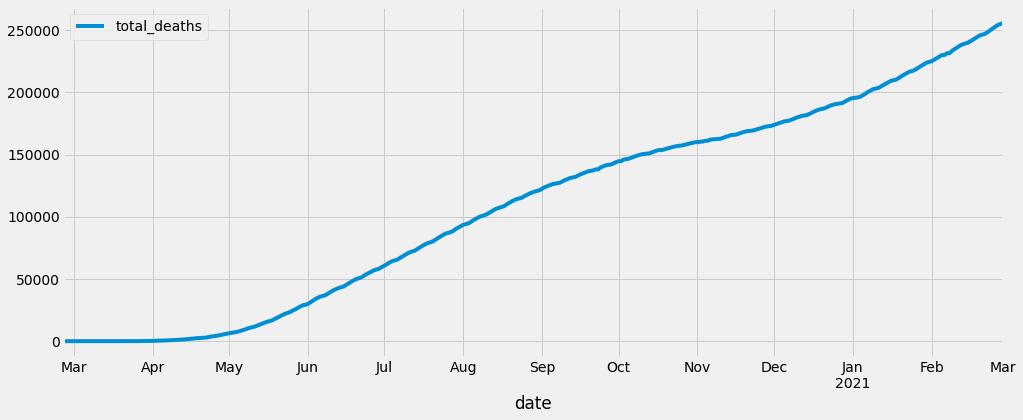

In [23]:
total_deaths.plot(figsize=(15,6))
plt.show()

50 mil novas mortes em 2021, em apenas 2 meses aconteceram 25% de todas as mortes por COVID-19 em 2020

# Pré-processamento

## Tornando a série estacionária

Um pré-requisito para que uma série temporal seja previsível é que ela seja estacionária.

Uma série temporal é dita estacionária quando ela se desenvolve no tempo aleatoriamente ao redor de uma média constante, refletindo alguma forma de equilíbrio estável. Tornar a série estacionária **elimina qualquer tendência ou sazonalidade**.

<img src="https://miro.medium.com/max/700/0*Dyml4bSlkE5WHdcc">

Primeira diferença:
- ΔZ(t) = Z(t) − Z(t−1)

Segunda diferença:
- Δ2Z(t) = Δ \[ΔZ(t)\] = Δ \[Z(t) − Z(t−1)\]

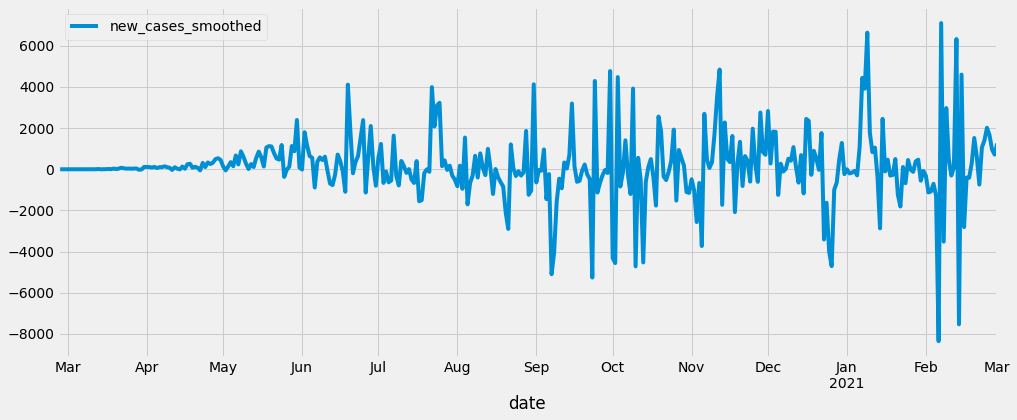

In [24]:
new_cases_diff = new_cases_smoothed.diff()
new_cases_diff.plot(figsize=(15,6))
plt.show()

In [25]:
new_cases_diff.drop(index=pd.to_datetime('2020-02-26'), axis=0, inplace=True)
new_cases_diff

,new_cases_smoothed
date,
2020-02-27,0.0
2020-02-28,0.0
2020-02-29,0.0
2020-03-01,0.0
2020-03-02,0.0
...,...
2021-02-25,2017.0
2021-02-26,1655.0
2021-02-27,952.0


## Teste Dickey-Fuller Aumentado

- H0: A série temporal é não-estacionária
- H1: A série temporal é estacionária



- **p-value > 0.05**: aceitamos a hipótese nula (H0) -> **a série é não-estacionária**
- **p-value <= 0.05**: rejeitamos a hipótese nula (H0) e aceitamos a hipótese alternativa (H1) -> **a série é estacionária**

In [26]:
from statsmodels.tsa.stattools import adfuller

def print_adfuller(serie):
    result = adfuller(serie)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [27]:
print_adfuller(new_cases_smoothed)

ADF Statistic: -1.248776
p-value: 0.652270
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [28]:
print_adfuller(new_cases_diff)

ADF Statistic: -4.674306
p-value: 0.000094
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


# Predizendo valores

## Dividindo base entre treino e teste

In [29]:
train = new_cases_smoothed[:'2021-01-31']
test = new_cases_smoothed['2021-02-01':]

In [30]:
train

,new_cases_smoothed
date,
2020-02-26,0
2020-02-27,0
2020-02-28,0
2020-02-29,0
2020-03-01,0
...,...
2021-01-27,51232
2021-01-28,51617
2021-01-29,52084


In [31]:
test

,new_cases_smoothed
date,
2021-02-01,51132
2021-02-02,50008
2021-02-03,48934
2021-02-04,48229
2021-02-05,46950
2021-02-06,38598
2021-02-07,45701
2021-02-08,42188
2021-02-09,45163


## Modelos ARIMA

**ARIMA**

**A**uto**R**egressive **I**ntegrated **M**oving **A**verage


Utiliza dados passados para prever o futuro, usando a autocorrelação e médias móveis.


<img src="https://miro.medium.com/max/524/0*Ql_BphTqarSBmgrZ" style="widith=400px" />


- AR -> p (PACF)
- I -> d (diferenças não sazonais)
- MA -> q (ACF)



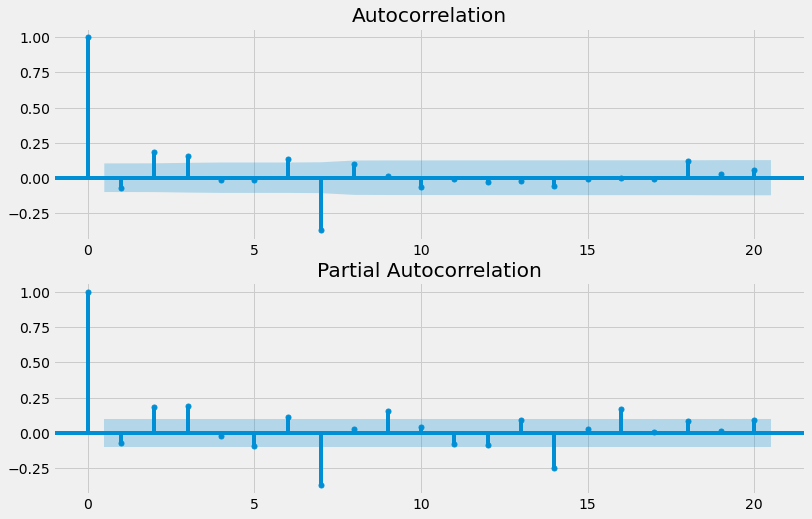

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(new_cases_diff,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_cases_diff,lags=20,ax=ax2)

In [33]:
from statsmodels.tsa.arima_model import ARIMA

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

model = ARIMA(train, order=(2, 0, 2))
results = model.fit(disp=-1)

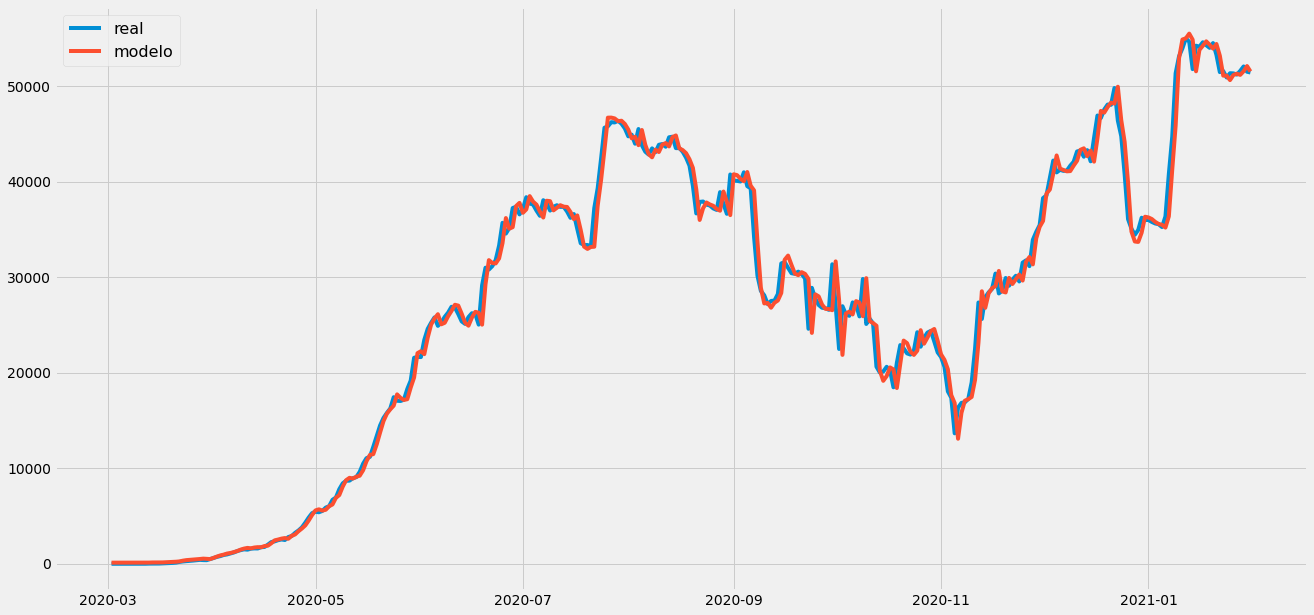

In [34]:
plt.figure(figsize=(20,10))
plt.plot(train['2020-03-02':], label='real')
plt.plot(results.fittedvalues['2020-03-02':], label='modelo')
plt.legend(loc='upper left', fontsize=16)
plt.show()

In [35]:
fitted = model.fit(disp=5)  

# Forecast
fc, se, conf = fitted.forecast(len(test))

# Avaliando métricas do modelo

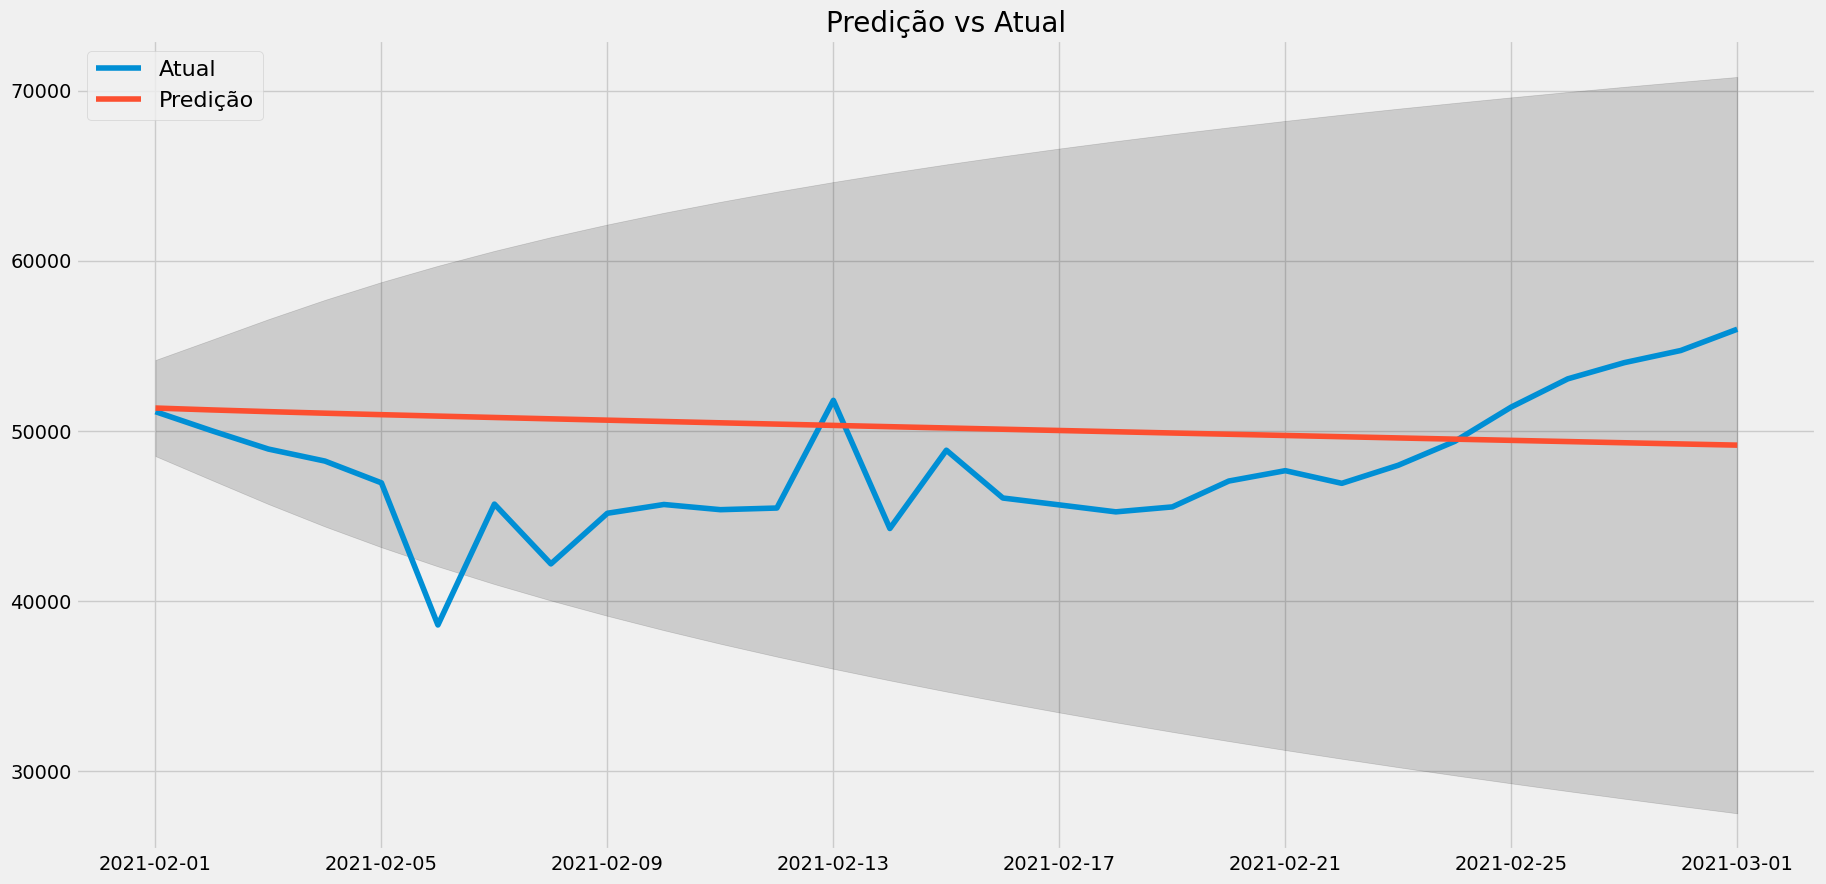

In [36]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(20,10), dpi=100)
plt.plot(test, label='Atual')
plt.plot(fc_series, label='Predição')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Predição vs Atual')
plt.legend(loc='upper left', fontsize=16)
plt.show()

In [37]:
forecast = pd.DataFrame(fc_series, columns=['new_cases'])

In [38]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    print ('MAPE: {:.4f}'.format(mape))
    print ('ME: {:.2f}'.format(me))
    print ('RMSE: {:.2f}'.format(rmse))
    return({'mape':mape, 'me':me, 'rmse':rmse})

In [39]:
metrics = forecast_accuracy(forecast.new_cases, test.new_cases_smoothed)

MAPE: 0.0856
ME: 2298.01
RMSE: 4689.61


## Março de 2021

In [40]:
warnings.filterwarnings("ignore") 

new_model = ARIMA(new_cases_smoothed[:'2021-02-26'], order=(2, 0, 2))
new_results = new_model.fit(disp=0)

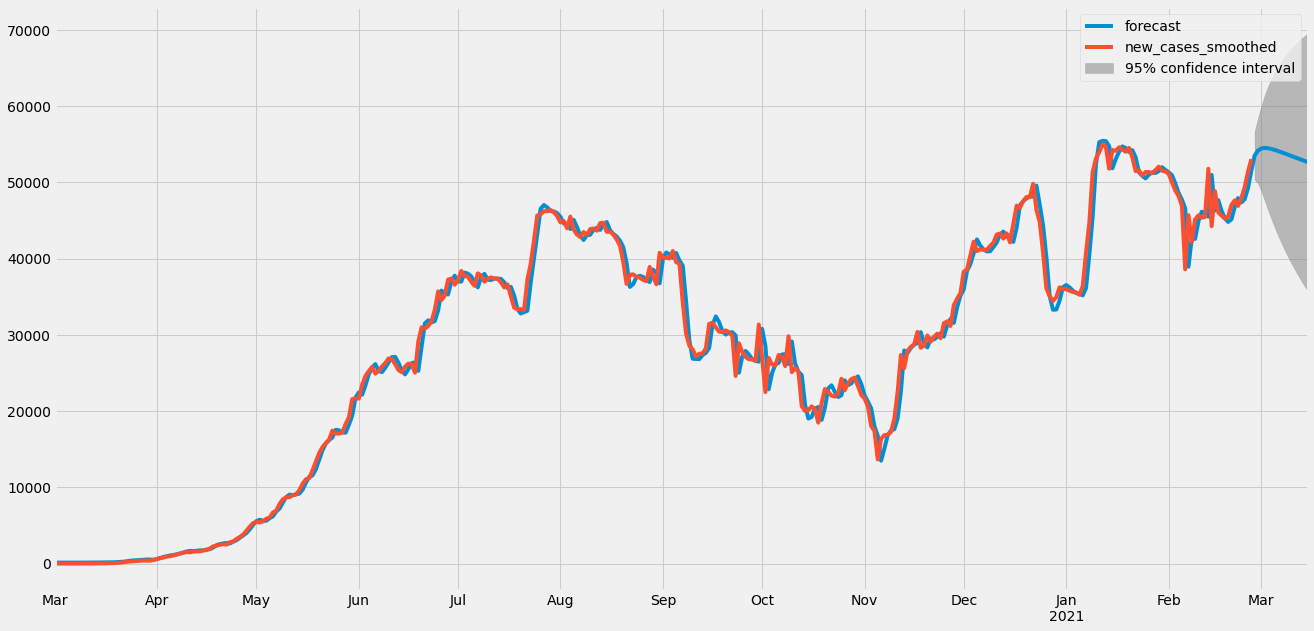

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))
fig = new_results.plot_predict(start='2020-03-01', end='2021-03-15', ax=ax)
plt.show()

## Predições da próxima semana

In [42]:
predictions = new_results.predict(start='2021-02-27', end='2021-03-27')

In [43]:
new_cases_smoothed['2021-02-27':]

,new_cases_smoothed
date,
2021-02-27,54012
2021-02-28,54726
2021-03-01,55977


In [44]:
predictions = pd.DataFrame(predictions, columns =['predictions'])
predictions.index.rename('date', inplace=True)

In [45]:
predictions

,predictions
date,
2021-02-27,53526.781097
2021-02-28,54172.270795
2021-03-01,54454.614894
2021-03-02,54535.165555
2021-03-03,54503.801745
2021-03-04,54410.587879
2021-03-05,54283.409456
2021-03-06,54137.797102
2021-03-07,53982.399100


In [46]:
compare = pd.merge(predictions, new_cases_smoothed['2021-02-27':].copy(), on = 'date', how='left')

In [47]:
compare['Mean Absolute Percentage Error'] = compare.apply(lambda row: np.mean(np.abs(row.predictions - row.new_cases_smoothed)/np.abs(row.new_cases_smoothed)),axis=1)

In [48]:
compare

,predictions,new_cases_smoothed,Mean Absolute Percentage Error
date,,,
2021-02-27,53526.781097,54012.0,0.008984
2021-02-28,54172.270795,54726.0,0.010118
2021-03-01,54454.614894,55977.0,0.027197
2021-03-02,54535.165555,NaN,NaN
2021-03-03,54503.801745,NaN,NaN
2021-03-04,54410.587879,NaN,NaN
2021-03-05,54283.409456,NaN,NaN
2021-03-06,54137.797102,NaN,NaN
2021-03-07,53982.399100,NaN,NaN


In [53]:
print('{:.3f}'.format(np.mean(
    compare[~compare['Mean Absolute Percentage Error'].isna()]['Mean Absolute Percentage Error'])))

0.015


## Avaliando comportamento do modelo ao longo do tempo

In [49]:
e = pd.DataFrame(columns=['date', 'predictions', 'real', 'MAPE'])

for index, row in new_cases_smoothed['2020-10-01':'2021-01-27'].iterrows():
    warnings.filterwarnings("ignore")

    model = ARIMA(new_cases_smoothed[:index], order=(2, 0, 2))
    results = model.fit(disp=0)

    start = index+pd.Timedelta(days=1)
    end = index+pd.Timedelta(days=30)
    print ('start: ', start)
    print ('end: ', end)
    predictions = results.predict(
        start=start, end=end)

    predictions = pd.DataFrame(predictions, columns=['predictions'])
    predictions.index.rename('date', inplace=True)

    compare = pd.merge(
        predictions, new_cases_smoothed[start:end].copy(), on='date', how='left')

    compare['MAPE'] = compare.apply(
        lambda row: np.mean(np.abs(row.predictions - row.new_cases_smoothed)/row.new_cases_smoothed), axis=1)

    error = compare['MAPE'].sum()/len(compare['MAPE'])
    
    print(index, error)

    e = e.append({'date': index, 'predictions': predictions.predictions,
                  'real': compare['new_cases_smoothed'], 'MAPE': error}, ignore_index=True)

start:  2020-10-02 00:00:00
end:  2020-10-31 00:00:00
2020-10-01 00:00:00 0.1871596693503944
start:  2020-10-03 00:00:00
end:  2020-11-01 00:00:00
2020-10-02 00:00:00 0.1362579569320698
start:  2020-10-04 00:00:00
end:  2020-11-02 00:00:00
2020-10-03 00:00:00 0.17843151049664016
start:  2020-10-05 00:00:00
end:  2020-11-03 00:00:00
2020-10-04 00:00:00 0.16641429458710025
start:  2020-10-06 00:00:00
end:  2020-11-04 00:00:00
2020-10-05 00:00:00 0.17055174547193908
start:  2020-10-07 00:00:00
end:  2020-11-05 00:00:00
2020-10-06 00:00:00 0.247880644165434
start:  2020-10-08 00:00:00
end:  2020-11-06 00:00:00
2020-10-07 00:00:00 0.28042109788473785
start:  2020-10-09 00:00:00
end:  2020-11-07 00:00:00
2020-10-08 00:00:00 0.247017425586611
start:  2020-10-10 00:00:00
end:  2020-11-08 00:00:00
2020-10-09 00:00:00 0.42581071126479464
start:  2020-10-11 00:00:00
end:  2020-11-09 00:00:00
2020-10-10 00:00:00 0.21911051463314707
start:  2020-10-12 00:00:00
end:  2020-11-10 00:00:00
2020-10-11 0

start:  2020-12-29 00:00:00
end:  2021-01-27 00:00:00
2020-12-28 00:00:00 0.3208827484662928
start:  2020-12-30 00:00:00
end:  2021-01-28 00:00:00
2020-12-29 00:00:00 0.2835653932102529
start:  2020-12-31 00:00:00
end:  2021-01-29 00:00:00
2020-12-30 00:00:00 0.2485155791957953
start:  2021-01-01 00:00:00
end:  2021-01-30 00:00:00
2020-12-31 00:00:00 0.24323343380071913
start:  2021-01-02 00:00:00
end:  2021-01-31 00:00:00
2021-01-01 00:00:00 0.2760480415939852
start:  2021-01-03 00:00:00
end:  2021-02-01 00:00:00
2021-01-02 00:00:00 0.2734183089687539
start:  2021-01-04 00:00:00
end:  2021-02-02 00:00:00
2021-01-03 00:00:00 0.29091195007233467
start:  2021-01-05 00:00:00
end:  2021-02-03 00:00:00
2021-01-04 00:00:00 0.3171423083935528
start:  2021-01-06 00:00:00
end:  2021-02-04 00:00:00
2021-01-05 00:00:00 0.33208290914283684
start:  2021-01-07 00:00:00
end:  2021-02-05 00:00:00
2021-01-06 00:00:00 0.29527714176027603
start:  2021-01-08 00:00:00
end:  2021-02-06 00:00:00
2021-01-07 0

In [50]:
e = e.set_index('date')

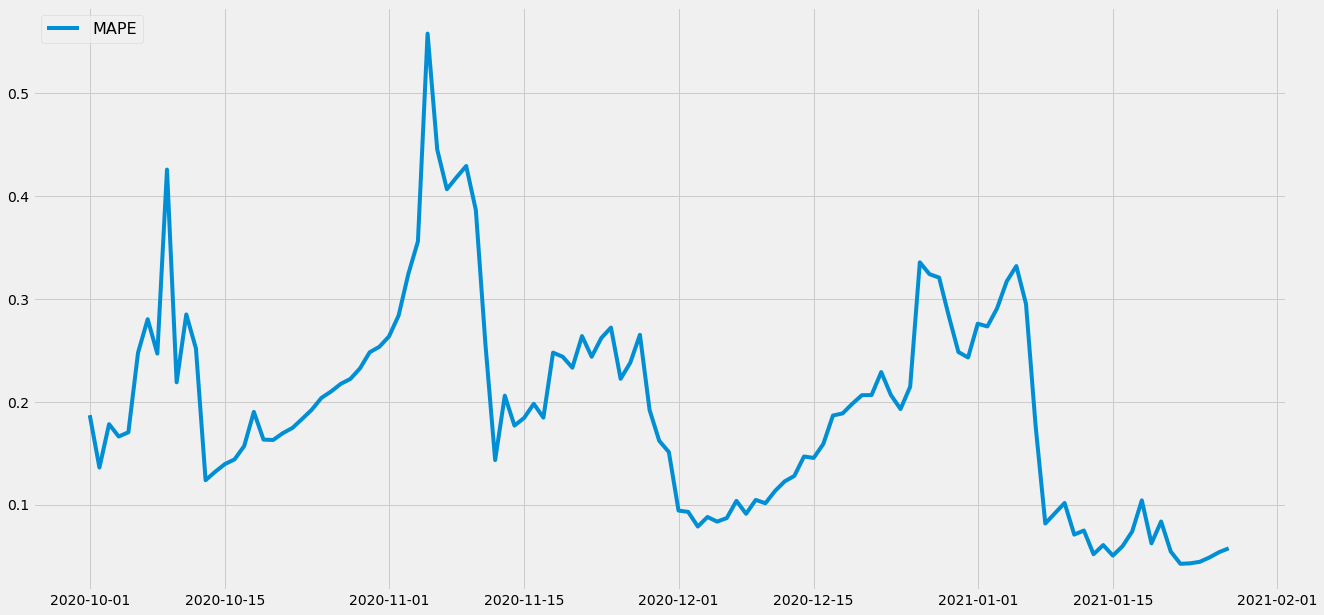

In [51]:
plt.figure(figsize=(20,10))
plt.plot(e[['MAPE']], label='MAPE')
plt.legend(loc='upper left', fontsize=16)
plt.show()

In [52]:
np.mean(e.MAPE)

0.19452610923292732